##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [3]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv'
voters = pd.read_csv(url)

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



In [4]:
##### Purpose:
## Analyze voter registration trends to provide insights that can inform campaign strategies and voter outreach programs.

##### Goal:
## To identify patterns and significant fluctuations in voter registration data across national and state levels.

##### Importance:
## Understanding these trends can help optimize voter engagement strategies, ensuring resources are effectively allocated to areas with fluctuating registration rates.

##### Research Questions:
## * National Trend: What has been the overall trend in voter registration in the U.S. over the last decade?
## * State Trend: How has voter registration in Delaware varied in comparison to national averages?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [5]:
print(voters.head())

  Jurisdiction  Year Month  New registered voters
0      Arizona  2016   Jan                  25852
1      Arizona  2016   Feb                  51155
2      Arizona  2016   Mar                  48614
3      Arizona  2016   Apr                  30668
4      Arizona  2020   Jan                  33229


Check for any missing data data. (1 point)

In [6]:
print(voters.isnull().sum())

Jurisdiction             0
Year                     0
Month                    0
New registered voters    0
dtype: int64


Check your data types. (1 point)

In [7]:
print(voters.dtypes)

Jurisdiction             object
Year                      int64
Month                    object
New registered voters     int64
dtype: object


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [8]:
voters.rename(columns={'Jurisdiction': 'NAME', 'New registered voters': 'registered_voters'}, inplace=True)

In [9]:
print(voters.columns)

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')


Explain any potential limitations to your data (2 points)

In [10]:
## There is only 12 states in the dataset and out of those 12, only 3 are republican states. The data is also for the two most argued and controversial elections which provides other limitations within itself including 2020's mass influx of new voters, mail-in ballots, and the over 20 million voters who disappeared after the 2020 election and never voted again, which directly effects the trends we're discussing.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [11]:
highest_registration = voters.loc[voters['registered_voters'].idxmax()]
print(highest_registration)

NAME                 California
Year                       2020
Month                       Feb
registered_voters        238281
Name: 13, dtype: object


What is the average voter registration? (1 points)

In [12]:
average_registration = voters['registered_voters'].mean()
print(f"The average voter registration is {average_registration}")

The average voter registration is 48223.46226415094


Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [13]:
high_voters = voters[voters['registered_voters'] > average_registration]
print(f"Number of times registration was above average: {high_voters.shape[0]}")

Number of times registration was above average: 36


How many times did each state go above the national average for new voter registration? (2 points)



In [14]:
national_average = voters['registered_voters'].mean()

above_average = voters[voters['registered_voters'] > national_average]

state_above_average_counts = above_average['NAME'].value_counts()

print(state_above_average_counts)


NAME
Texas             8
California        7
Florida           7
North Carolina    6
Illinois          4
Arizona           3
Georgia           1
Name: count, dtype: int64


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [15]:
top_states = voters.groupby('NAME')['registered_voters'].mean().nlargest(3)
print(top_states)

NAME
California    144545.375
Texas         114610.100
Florida        65868.125
Name: registered_voters, dtype: float64


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

<ipython-input-16-d53506053020>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_by_state, x='NAME', y='registered_voters', palette='viridis')


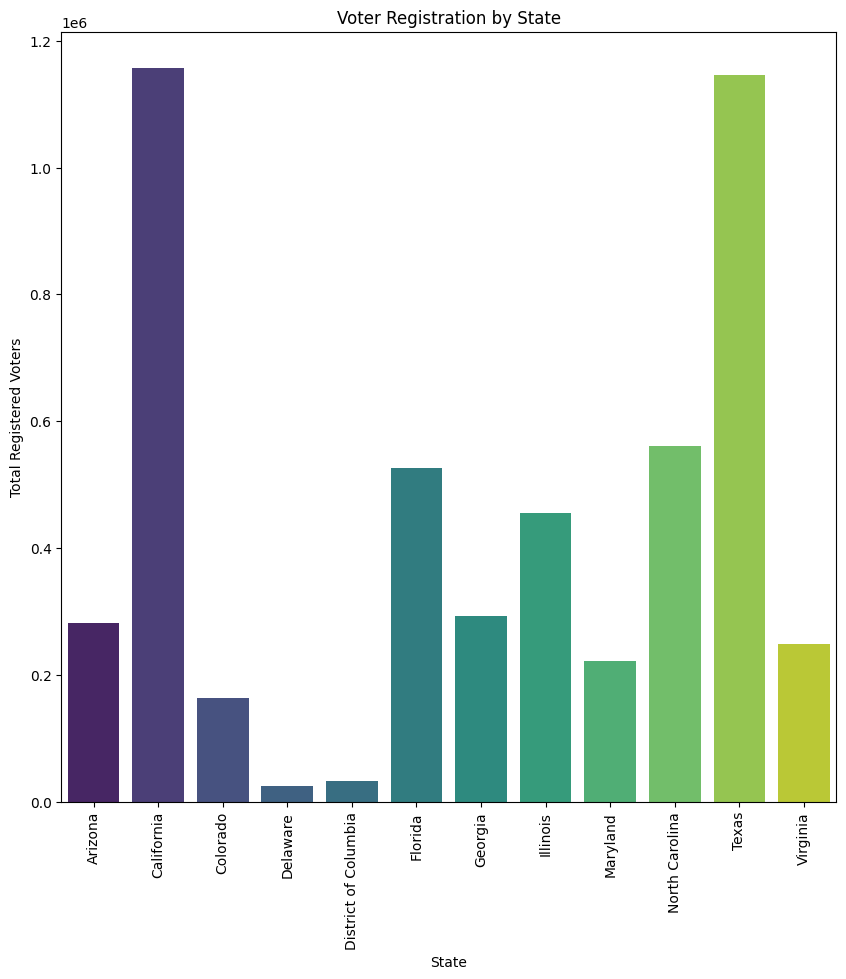

In [16]:
total_by_state = voters.groupby('NAME')['registered_voters'].sum().reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(data=total_by_state, x='NAME', y='registered_voters', palette='viridis')
plt.xlabel('State')
plt.ylabel('Total Registered Voters')
plt.title('Voter Registration by State')
plt.xticks(rotation=90)
plt.show()

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

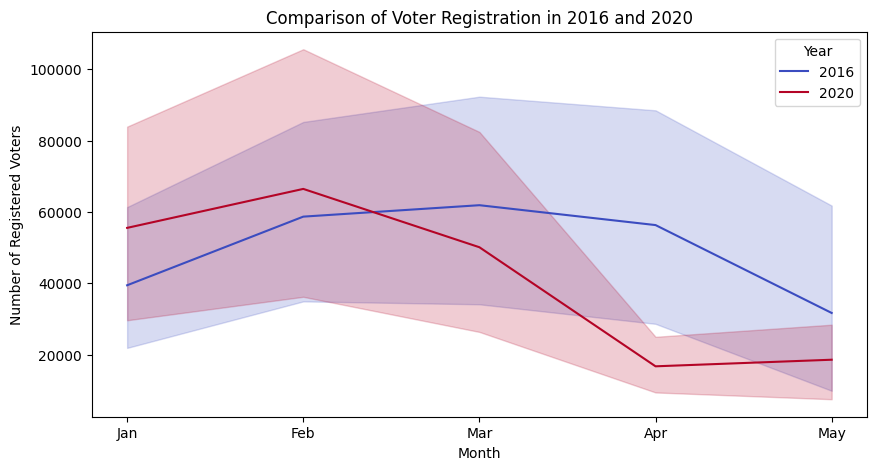

In [17]:
data_2016_2020 = voters[voters['Year'].isin([2016, 2020])]
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_2016_2020, x='Month', y='registered_voters', hue='Year', palette='coolwarm')
plt.title('Comparison of Voter Registration in 2016 and 2020')
plt.xlabel('Month')
plt.ylabel('Number of Registered Voters')
plt.show()

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

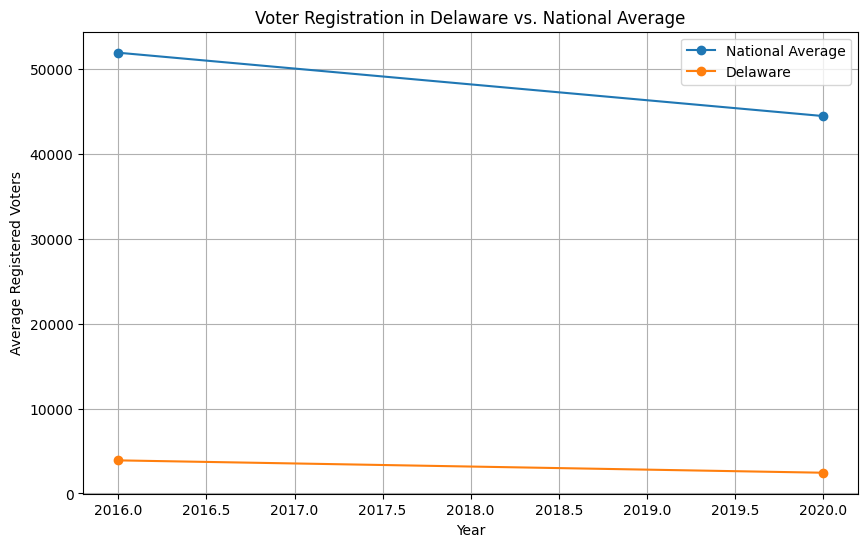

In [18]:
national_avg_per_year = voters.groupby('Year')['registered_voters'].mean()

delaware_data = voters[voters['NAME'] == 'Delaware']

delaware_avg_per_year = delaware_data.groupby('Year')['registered_voters'].mean()

comparison_df = pd.DataFrame({
    'National Average': national_avg_per_year,
    'Delaware': delaware_avg_per_year
})



plt.figure(figsize=(10, 6))
comparison_df.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Voter Registration in Delaware vs. National Average')
plt.xlabel('Year')
plt.ylabel('Average Registered Voters')
plt.grid(True)
plt.legend(['National Average', 'Delaware'])
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [19]:
!git clone https://github.com/SFord87/325-Datasets

shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 8.00 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Set our continental US bounding box to us for the next questions. (2 points)

In [20]:
continental_bounds = {
    'west': -124.848974,
    'east': -66.93457,
    'north': 49.384358,
    'south': 24.396308
}

continental_states = states.cx[continental_bounds['west']:continental_bounds['east'], continental_bounds['south']:continental_bounds['north']]

Create a dataframe that shows the average voter registration per state. (2 points)

In [21]:
average_voter_reg = voters.groupby('NAME')['registered_voters'].mean().reset_index()

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [22]:
merged_data = continental_states.merge(average_voter_reg, how='inner', left_on='NAME', right_on='NAME')

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

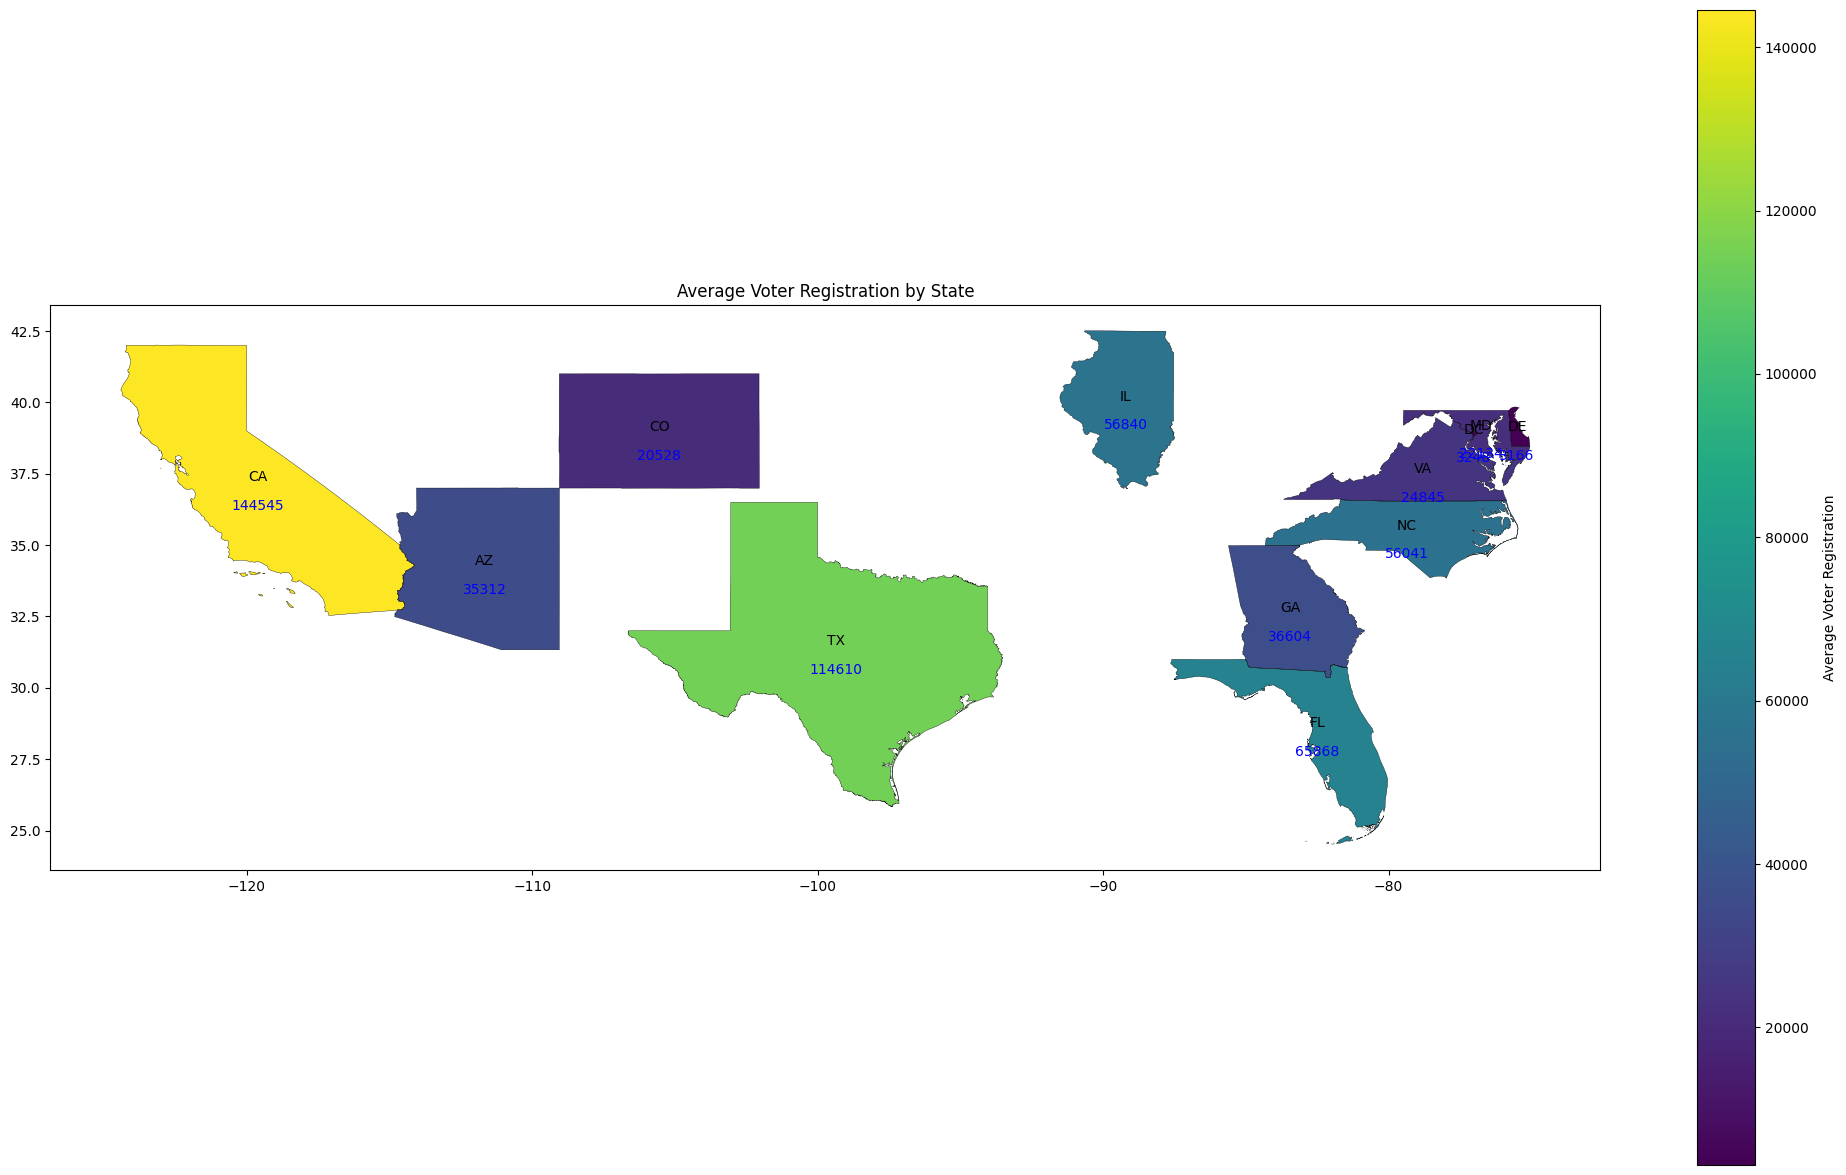

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
merged_data.boundary.plot(ax=ax, linewidth=0.25, edgecolor='black')
merged_data.plot(column='registered_voters', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Average Voter Registration"})
plt.title('Average Voter Registration by State')

for idx, row in merged_data.iterrows():
    plt.annotate(text=row['STUSPS'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), ha='center')
    plt.annotate(text=f"{row['registered_voters']:.0f}", xy=(row['geometry'].centroid.x, row['geometry'].centroid.y - 1), ha='center', color='blue')

plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


In [ ]:
##### Insights:

## The analysis provided a clear visualization of voter registration trends across the continental United States, highlighting significant variances between states. It became evident that certain states have consistently higher or lower registration rates, which could indicate underlying demographic or socio-economic factors influencing these trends.


##### Suggestions:

## Based on the findings, it is recommended that voter registration efforts be tailored to state-specific needs. States with lower registration rates might benefit from targeted campaigns that address local barriers to registration, such as lack of information or accessibility issues.


##### Possible Next Steps:

## A crucial next step in this project would be to conduct a demographic analysis to understand the factors driving registration disparities among states. Additionally, examining changes in registration patterns over time could offer insights into the effectiveness of past voter registration policies and campaigns.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [1]:
### Cody Musial